# Załadowanie potrzebnych bibliotek

#### Wyjaśnienie kodu
Ten kod importuje kilka bibliotek i modułów niezbędnych do przetwarzania obrazów, budowania i trenowania modelu głębokiego uczenia oraz podziału danych na zbiory treningowe i testowe.

#### Importy TensorFlow, NumPy i Pandas:
- `import tensorflow as tf`: Importuje bibliotekę TensorFlow, która jest używana do budowania i trenowania modeli głębokiego uczenia.
- `import numpy as np`: Importuje bibliotekę NumPy, która jest używana do operacji numerycznych na tablicach.
- `import pandas as pd`: Importuje bibliotekę Pandas, która jest używana do manipulacji i analizy danych w formie tabelarycznej.

#### Importy Matplotlib i os:
- `import matplotlib.pyplot as plt`: Importuje bibliotekę Matplotlib do tworzenia wykresów i wizualizacji danych.
- `import os`: Importuje moduł os, który jest używany do interakcji z systemem operacyjnym, np. do pracy z plikami i katalogami.
- `import random`: Importuje moduł random, który jest używany do generowania losowych liczb i wyborów.

#### Importy z TensorFlow Keras:
- `from tensorflow.keras.preprocessing.image import load_img, img_to_array`: Importuje funkcje `load_img` i `img_to_array`, które są używane do ładowania i przetwarzania obrazów.
- `from tensorflow.keras.models import Sequential`: Importuje klasę `Sequential`, która jest używana do tworzenia sekwencyjnych modeli sieci neuronowych.
- `from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout`: Importuje warstwy `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense` i `Dropout`, które są używane do budowy konwolucyjnych sieci neuronowych (CNN).
- `from tensorflow.keras.optimizers import Adam`: Importuje optymalizator `Adam`, który jest używany do trenowania modeli.
- `from tensorflow.keras.callbacks import EarlyStopping`: Importuje callback `EarlyStopping`, który jest używany do zatrzymywania treningu, gdy model przestaje się poprawiać, aby uniknąć przeuczenia.

#### Importy z Scikit-learn:
- `from sklearn.model_selection import train_test_split`: Importuje funkcję `train_test_split`, która jest używana do podziału danych na zestawy treningowe i testowe.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array #type: ignore
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential #type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #type: ignore
from tensorflow.keras.optimizers import Adam #type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint #type: ignore
from tensorflow.keras.regularizers import l2 #type: ignore
from tensorflow.keras.layers import BatchNormalization #type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator #type: ignore
from tensorflow.keras.models import load_model #type: ignore

# Przetwarzanie i Podział Danych Obrazowych

#### Wyjaśnienie kodu
Ten kod ładuje obrazy z katalogu, przetwarza je, normalizuje i dzieli na zbiory treningowe i testowe.

#### Ustawienie ścieżki do katalogu z danymi:
- `data_dir = 'data'`: Zmienna `data_dir` przechowuje ścieżkę do katalogu, w którym znajdują się obrazy.

#### Inicjalizacja list na obrazy i etykiety:
- `images = []`: Lista `images` będzie przechowywać obrazy.
- `labels = []`: Lista `labels` będzie przechowywać odpowiadające im etykiety.

#### Iteracja po plikach w katalogu z danymi:
- Pętla iteruje po wszystkich plikach w katalogu `data_dir`. Jeśli plik ma rozszerzenie `.jpg` lub `.png`, sprawdzamy, czy nazwa pliku jest w odpowiednim formacie. Jeśli tak, ładujemy obraz, konwertujemy go na tablicę NumPy i dodajemy do listy `images`. Etykieta (wiek) jest wyodrębniana z nazwy pliku i dodawana do listy `labels`.

#### Konwersja list na tablice NumPy:
- `images = np.array(images)`: Lista `images` jest konwertowana na tablicę NumPy.
- `labels = np.array(labels)`: Lista `labels` jest konwertowana na tablicę NumPy.

#### Normalizacja obrazów:
- `images = images / 255.0`: Wartości pikseli obrazów są skalowane do zakresu [0, 1] przez podzielenie przez 255.

#### Podział danych na zbiory treningowe i testowe:
- `X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)`: Dane są dzielone na zbiory treningowe i testowe za pomocą funkcji `train_test_split`. 20% danych jest przeznaczone na zbiór testowy (`test_size=0.2`), a reszta na zbiór treningowy. Parametr `random_state` zapewnia powtarzalność podziału.

#### Wyświetlenie kształtu danych:
- `print("Kształt danych treningowych:", X_train.shape)`: Wyświetla kształt danych treningowych.
- `print("Kształt etykiet treningowych:", y_train.shape)`: Wyświetla kształt etykiet treningowych.
- `print("Kształt danych testowych:", X_test.shape)`: Wyświetla kształt danych testowych.
- `print("Kształt etykiet testowych:", y_test.shape)`: Wyświetla kształt etykiet testowych.

In [6]:
data_dir = 'data'

images = []
ages = []

for filename in os.listdir(data_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        parts = filename.split('_')
        if len(parts) >= 1:
            img_path = os.path.join(data_dir, filename)
            img = load_img(img_path, target_size=(128, 128))
            img_array = img_to_array(img)
            
            images.append(img_array)
            
            age = int(parts[0]) 
            ages.append(age)

images = np.array(images)
ages = np.array(ages)

images = images / 255.0

X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)

print("Kształt danych treningowych:", X_train.shape)
print("Kształt etykiet treningowych:", y_train.shape)
print("Kształt danych testowych:", X_test.shape)
print("Kształt etykiet testowych:", y_test.shape)

Kształt danych treningowych: (19284, 128, 128, 3)
Kształt etykiet treningowych: (19284,)
Kształt danych testowych: (4822, 128, 128, 3)
Kształt etykiet testowych: (4822,)


# Wyświetlanie Przykładowego Zdjęcia z Informacjami o Wieku, Płci i Rasie

#### Wyjaśnienie kodu
Ten kod definiuje funkcję, która losowo wybiera obraz z katalogu, przetwarza go i wyświetla wraz z informacjami o wieku, płci i rasie osoby na zdjęciu.

#### Definicja funkcji `show_sample_image`:
- `def show_sample_image(data_dir)`: Funkcja przyjmuje ścieżkę do katalogu z danymi jako argument.

#### Lista plików w katalogu:
- `files = [f for f in os.listdir(data_dir) if f.endswith('.jpg') or f.endswith('.png')]`: Tworzymy listę plików w katalogu, które mają rozszerzenie `.jpg` lub `.png`.

#### Wybór losowego pliku:
- `filename = random.choice(files)`: Wybieramy losowy plik z listy.

#### Ścieżka do pliku:
- `img_path = os.path.join(data_dir, filename)`: Tworzymy pełną ścieżkę do wybranego pliku.

#### Załaduj obraz:
- `img = load_img(img_path, target_size=(128, 128))`: Ładujemy obraz i zmieniamy jego rozmiar na 128x128 pikseli.
- `img_array = img_to_array(img) / 255.0`: Konwertujemy obraz na tablicę NumPy i normalizujemy wartości pikseli.

#### Wyodrębnij informacje z nazwy pliku:
- `parts = filename.split('_')`: Dzielimy nazwę pliku na części.
- `age = parts[0]`: Wyodrębniamy wiek z pierwszej części nazwy pliku.
- `gender = 'Male' if parts[1] == '1' else 'Female'`: Wyodrębniamy płeć z drugiej części nazwy pliku.
- `race = parts[2]`: Wyodrębniamy rasę z trzeciej części nazwy pliku.

#### Mapa ras:
- `race_map = {...}`: Tworzymy mapę ras, przypisując odpowiednie wartości na podstawie kodu rasy.
- `race = race_map.get(race, 'Unknown')`: Przypisujemy odpowiednią wartość rasy na podstawie wyodrębnionego kodu rasy.

#### Wyświetl obraz z informacjami:
- `plt.imshow(img_array)`: Wyświetlamy obraz.
- `plt.title(f'Age: {age}, Gender: {gender}, Race: {race}')`: Ustawiamy tytuł obrazu zawierający wiek, płeć i rasę.
- `plt.axis('off')`: Wyłączamy osie.
- `plt.show()`: Wyświetlamy obraz.

#### Przykład użycia:
- `data_dir = 'data'`: Ustawiamy ścieżkę do katalogu z danymi.
- `show_sample_image(data_dir)`: Wywołujemy funkcję `show_sample_image` z odpowiednią ścieżką do katalogu z danymi.

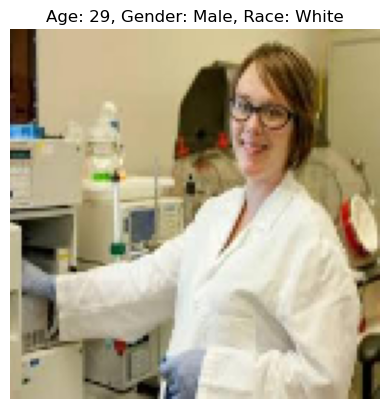

In [3]:
def show_sample_image(data_dir):
    files = [f for f in os.listdir(data_dir) if f.endswith('.jpg') or f.endswith('.png')]
    
    filename = random.choice(files)
    
    img_path = os.path.join(data_dir, filename)
    
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    
    parts = filename.split('_')
    age = parts[0]
    gender = 'Male' if parts[1] == '1' else 'Female'
    race = parts[2]
    
    race_map = {
        '0': 'White',
        '1': 'Black',
        '2': 'Asian',
        '3': 'Indian',
        '4': 'Other'
    }
    
    race = race_map.get(race, 'Unknown')
    
    plt.imshow(img_array)
    plt.title(f'Age: {age}, Gender: {gender}, Race: {race}')
    plt.axis('off')
    plt.show()

data_dir = 'data'
show_sample_image(data_dir)

# Definicja i Kompilacja Zaawansowanego Modelu CNN

#### Wyjaśnienie kodu
Ten kod definiuje zaawansowaną konwolucyjną sieć neuronową (CNN) do przewidywania wieku na podstawie zdjęć twarzy, z dodatkowymi technikami regularyzacji i normalizacji.

#### Architektura modelu:

1. **Pierwszy blok konwolucyjny:**
   - Dwie warstwy `Conv2D(32)` z regularyzacją L2
   - Każda warstwa konwolucyjna następowana przez `BatchNormalization`
   - `MaxPooling2D` na końcu bloku

2. **Drugi blok konwolucyjny:**
   - Dwie warstwy `Conv2D(64)` z regularyzacją L2
   - `BatchNormalization` po każdej warstwie konwolucyjnej
   - `MaxPooling2D` redukujący wymiary

3. **Trzeci blok konwolucyjny:**
   - Dwie warstwy `Conv2D(128)` z regularyzacją L2
   - `BatchNormalization` po każdej warstwie
   - Końcowy `MaxPooling2D`

4. **Warstwy w pełni połączone:**
   - `Flatten()` do spłaszczenia danych
   - Trzy warstwy Dense (256→128→64) z:
     - Regularyzacją L2
     - Normalizacją wsadową
     - Dropout (0.5 i 0.3) dla pierwszych dwóch warstw
   - Końcowa warstwa `Dense(1)` do predykcji wieku

#### Techniki regularyzacji i optymalizacji:
- **Regularyzacja L2** (`kernel_regularizer=l2(0.01)`): zapobiega przeuczeniu
- **Batch Normalization**: przyspiesza trening i stabilizuje uczenie
- **Dropout**: redukuje przeuczenie przez losowe wyłączanie neuronów
- **Funkcja straty Huber**: bardziej odporna na wartości odstające niż MSE

#### Kompilacja modelu:
```python 
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Niski learning rate dla stabilnego uczenia
    loss='huber',                          # Odporność na outliers
    metrics=['mae']                        # Średni błąd bezwzględny jako metryka
)
```

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),

    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001),
                loss='huber',
                metrics=['mae'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 124, 124, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 60, 60, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 58, 58, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 58, 58, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 27, 27, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 5,050,657 (19.27 MB)

 Trainable params: 5,048,865 (19.26 MB)

 Non-trainable params: 1,792 (7.00 KB)

# Trenowanie i Monitorowanie Modelu CNN

#### Wyjaśnienie kodu
Ten kod implementuje zaawansowane techniki trenowania modelu, włączając augmentację danych, adaptacyjne dostosowanie parametrów uczenia oraz wizualizację procesu treningu.

#### Konfiguracja augmentacji danych:
- `datagen = ImageDataGenerator()`: Tworzy generator do augmentacji danych obrazowych.
  - `rotation_range=20`: Losowy obrót obrazu o kąt do 20 stopni.
  - `width_shift_range=0.2`: Przesunięcie poziome o maksymalnie 20%.
  - `height_shift_range=0.2`: Przesunięcie pionowe o maksymalnie 20%.
  - `horizontal_flip=True`: Losowe odbicie poziome obrazu.
  - `fill_mode='nearest'`: Metoda wypełniania powstałych pustych pikseli.

#### Konfiguracja callbacków:
- `early_stopping`: Zapobiega przetrenowaniu modelu.
  - `monitor='val_loss'`: Monitoruje stratę walidacyjną.
  - `patience=7`: Czeka 7 epok przed zatrzymaniem.
  - `restore_best_weights=True`: Przywraca najlepsze wagi modelu.

- `reduce_lr`: Dostosowuje learning rate podczas treningu.
  - `monitor='val_loss'`: Monitoruje stratę walidacyjną.
  - `factor=0.2`: Redukuje learning rate o 80%.
  - `patience=5`: Czeka 5 epok przed zmianą.
  - `min_lr=1e-6`: Minimalny dozwolony learning rate.

- `checkpoint`: Zapisuje najlepszą wersję modelu.
  - `'best_model.keras'`: Nazwa pliku do zapisu modelu.
  - `save_best_only=True`: Zapisuje tylko najlepszą wersję.
  - `mode='min'`: Tryb minimalizacji monitorowanej wartości.

#### Trenowanie modelu:
- `model.fit()`: Rozpoczyna proces treningu.
  - Generator danych z augmentacją (`batch_size=4`).
  - 100 epok maksymalnego treningu.
  - Dane walidacyjne do monitorowania.
  - Lista callbacków do kontroli treningu.
  - Liczba kroków na epokę.

#### Wizualizacja procesu uczenia:
- **Wykres straty:**
  - Porównanie straty treningowej i walidacyjnej.
  - Oś X: liczba epok.
  - Oś Y: wartość funkcji straty.

- **Wykres MAE:**
  - Porównanie błędu średniego bezwzględnego.
  - Oś X: liczba epok.
  - Oś Y: wartość MAE.
  - Osobne linie dla zbioru treningowego i walidacyjnego.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=4),
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr, checkpoint],
    steps_per_epoch=len(X_train) // 32
)

plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='MAE treningowe')
plt.plot(history.history['val_mae'], label='MAE walidacyjne')
plt.xlabel('Epoka')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Wczytanie i Ewaluacja Modelu

#### Wyjaśnienie kodu
Ten kod wczytuje wytrenowany model, ocenia jego wydajność na zbiorze testowym oraz wizualnie przedstawia dokładność przewidywania wieku.

#### Wczytanie modelu:
- `model = tf.keras.models.load_model('best_model.keras')`: 
  - Wczytuje zapisany wcześniej model z pliku
  - Format `.keras` to standardowy format zapisu modeli w nowszych wersjach TensorFlow

#### Ewaluacja modelu:
- `test_loss, test_mae = model.evaluate(X_test, y_test)`: 
  - Oblicza metryki wydajności na zbiorze testowym
  - `test_loss`: Wartość funkcji straty (MSE lub Huber)
  - `test_mae`: Średni błąd bezwzględny w latach

#### Wyświetlenie wyników:
- Pokazuje wartości metryk z dokładnością do 2 miejsc po przecinku

#### Generowanie predykcji:
- `y_pred = model.predict(X_test)`: Wykonuje przewidywania wieku dla wszystkich obrazów testowych

#### Wizualizacja wyników:
- Tworzy wykres porównujący rzeczywisty wiek z przewidywanym
- Czerwona linia pokazuje idealne dopasowanie (przewidywany = rzeczywisty)

#### Formatowanie wykresu:
- Dodaje etykiety, tytuł, legendę i siatkę
- Wyświetla finalny wykres

Im bliżej punkty znajdują się czerwonej linii, tym dokładniejsze są przewidywania modelu dla danego wieku. Rozproszenie punktów wokół linii pokazuje błąd predykcji dla różnych grup wiekowych.

In [ ]:
model = load_model('best_model.keras')

test_loss, test_mae = model.evaluate(X_test, y_test)

print(f"Strata na danych testowych: {test_loss}")
print(f"MAE na danych testowych: {test_mae}")

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Idealna predykcja')
plt.xlabel('Wiek rzeczywisty')
plt.ylabel('Wiek przewidziany')
plt.legend()
plt.title("Porównanie: rzeczywisty vs przewidziany wiek")
plt.grid(True)
plt.show()

# Predykcja Wieku na Nowych Zdjęciach

#### Wyjaśnienie kodu
Ten kod wczytuje wytrenowany model i wykorzystuje go do przewidywania wieku osób na nowych zdjęciach, wraz z wizualizacją wyników.

#### Wczytanie modelu:
- `model = load_model('best_model.keras')`: Wczytuje zapisany wcześniej model

#### Przygotowanie danych:
- `new_data_dir = 'new_data'`: Ścieżka do katalogu z nowymi zdjęciami
- Inicjalizacja list:
  - `new_images = []`: Lista na przetworzone obrazy
  - `filenames = []`: Lista na nazwy plików

#### Przetwarzanie obrazów:
- Wczytywanie zdjęć z podanego katalogu
- Zmiana rozmiaru na 128x128 pikseli
- Konwersja na format tablicowy

#### Normalizacja danych:
- `new_images = np.array(new_images)`: Konwersja na tablicę NumPy
- `new_images = new_images / 255.0`: Normalizacja wartości pikseli do zakresu [0,1]

#### Predykcja i wizualizacja:
- Iteracja przez wszystkie zdjęcia i ich nazwy
- Wyświetlanie każdego zdjęcia w osobnym oknie
- Prezentacja nazwy pliku i przewidywanego wieku
- Formatowanie wieku do jednego miejsca po przecinku
- Wyłączenie osi dla lepszej prezentacji

Ten kod umożliwia praktyczne zastosowanie wytrenowanego modelu do przewidywania wieku na nowych zdjęciach, z czytelną wizualną prezentacją wyników.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


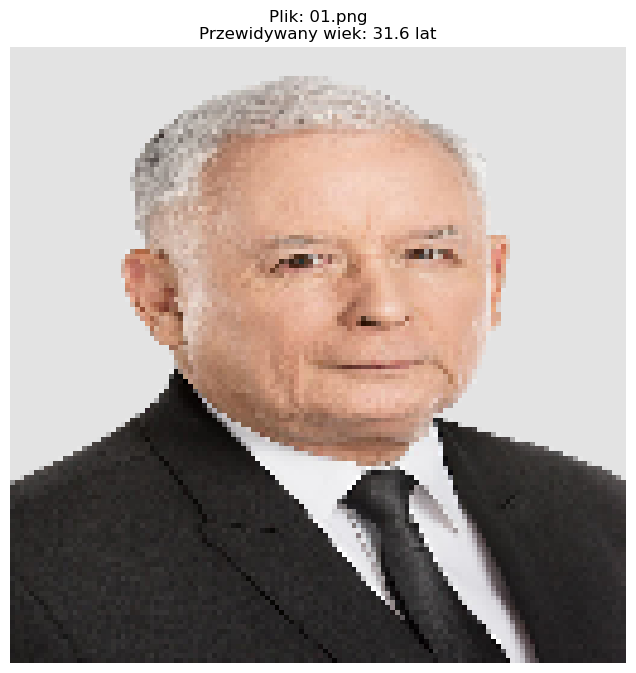

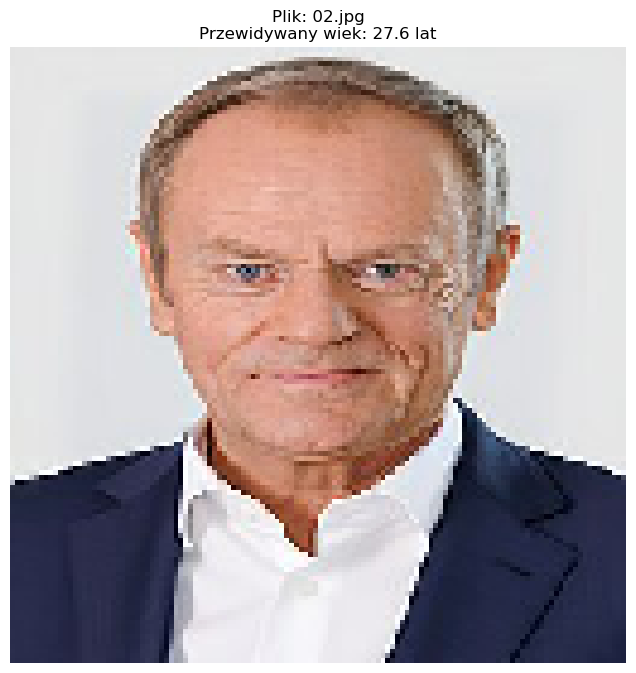

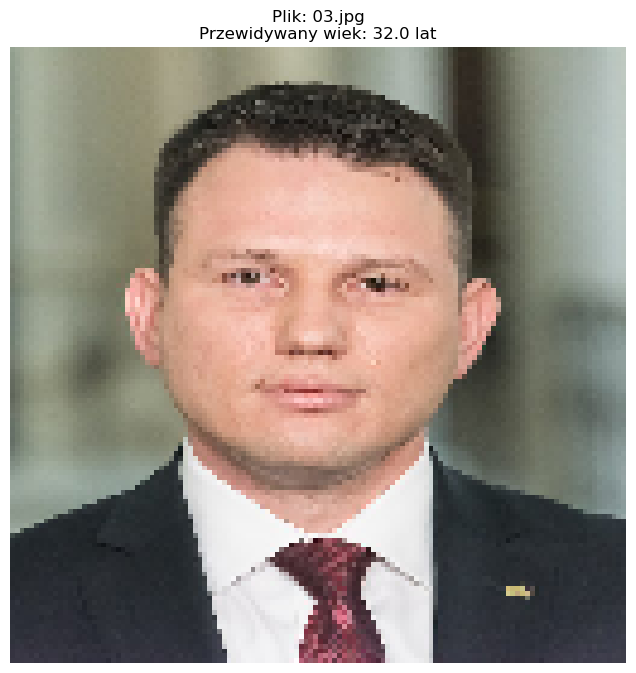

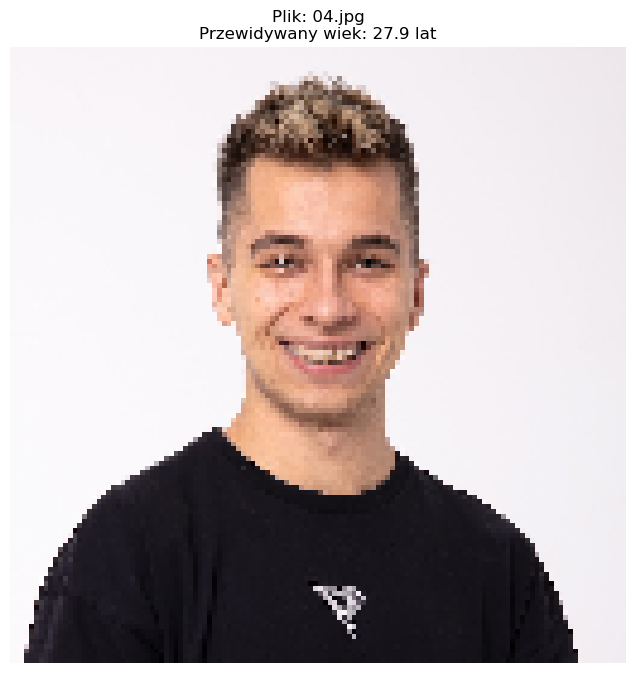

In [12]:
model = load_model('best_model.keras')

new_data_dir = 'new_data'

new_images = []
filenames = []  

for filename in os.listdir(new_data_dir):
    if filename.endswith(('.jpg', '.png')):
        filenames.append(filename)
        
        img_path = os.path.join(new_data_dir, filename)
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img)
        new_images.append(img_array)

new_images = np.array(new_images)
new_images = new_images / 255.0

new_predictions = model.predict(new_images)

for i, (img_array, filename) in enumerate(zip(new_images, filenames)):
    plt.figure(figsize=(8, 8))
    plt.imshow(img_array)
    plt.title(f'Plik: {filename}\nPrzewidywany wiek: {new_predictions[i][0]:.1f} lat')
    plt.axis('off')
    plt.show()